In [2]:
# Importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score


In [4]:
# Loading  the dataset
data = pd.read_excel("Heart Attack Data Set spreadsheet.xlsx", header=0, names=["combined"]) # data is in one column, separated by commas

# Splitting the single column by commas to separate each feature
data = data["combined"].str.split(",", expand=True)

# Renaming the  columns according to the dataset structure
data.columns = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", 
                "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]

Data Preprocessing

In [7]:

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())



Missing Values:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [9]:
# Separating columns based on type of data
continuous_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

Exploratory Data Analysis (EDA)

In [11]:
# Previewing the dataset
print("Dataset Preview:")
data.head()

Dataset Preview:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [13]:
# Displaying the dataset information
print("\nDataset Information:")
data.info()





Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       303 non-null    object
 1   sex       303 non-null    object
 2   cp        303 non-null    object
 3   trestbps  303 non-null    object
 4   chol      303 non-null    object
 5   fbs       303 non-null    object
 6   restecg   303 non-null    object
 7   thalach   303 non-null    object
 8   exang     303 non-null    object
 9   oldpeak   303 non-null    object
 10  slope     303 non-null    object
 11  ca        303 non-null    object
 12  thal      303 non-null    object
 13  target    303 non-null    object
dtypes: object(14)
memory usage: 33.3+ KB


In [25]:
# Descriptive statistics for categorical features
print("\nDescriptive Statistics for Categorical Features:")
data[categorical_features].describe()




Descriptive Statistics for Categorical Features:


,sex,cp,fbs,restecg,exang,slope,ca,thal
count,303,303,303,303,303,303,303,303
unique,2,4,2,3,2,3,5,4
top,1,0,0,1,0,2,0,2
freq,207,143,258,152,204,142,175,166


In [27]:
# Converting all columns to numeric types
data = data.apply(pd.to_numeric)

In [31]:
# Descriptive statistics for continuous features
print("Descriptive Statistics for Continuous Features:")
data[continuous_features].describe()


Descriptive Statistics for Continuous Features:


,age,trestbps,chol,thalach,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


Data Visualization

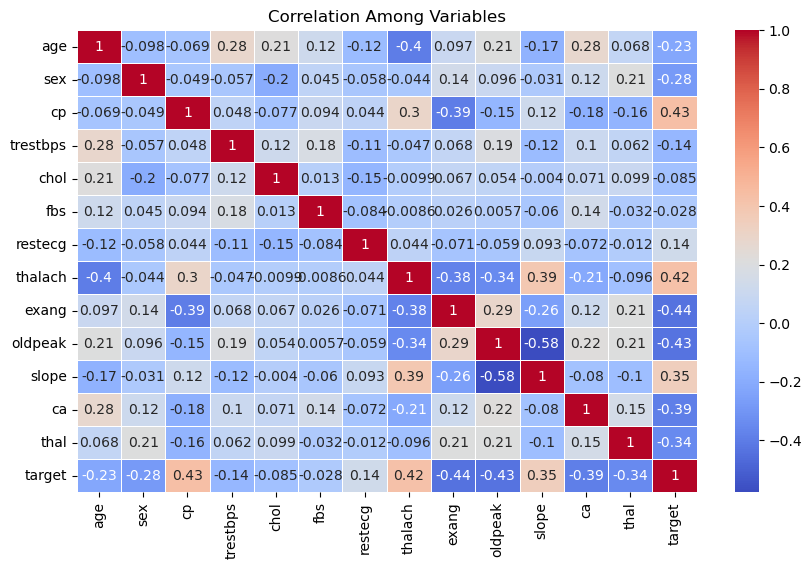

In [36]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Among Variables")
plt.show()

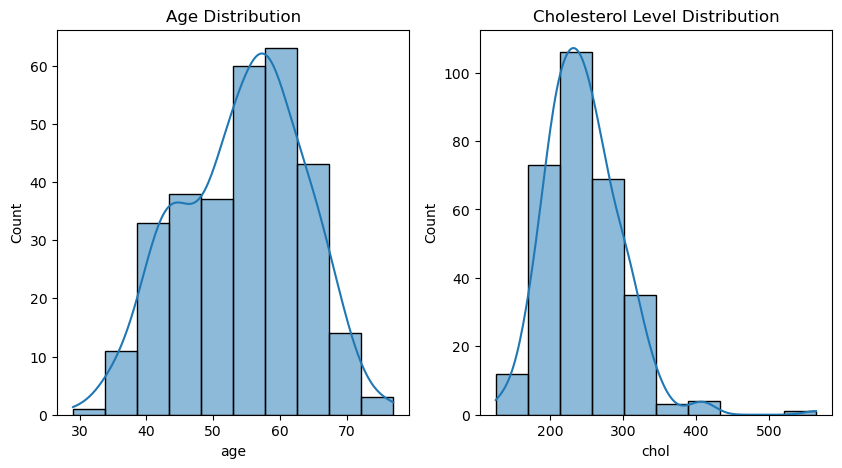

In [38]:
# Visualizing age and cholesterol distributions
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(data['age'], bins=10, kde=True)
plt.title("Age Distribution")

plt.subplot(1, 2, 2)
sns.histplot(data['chol'], bins=10, kde=True)
plt.title("Cholesterol Level Distribution")
plt.show()

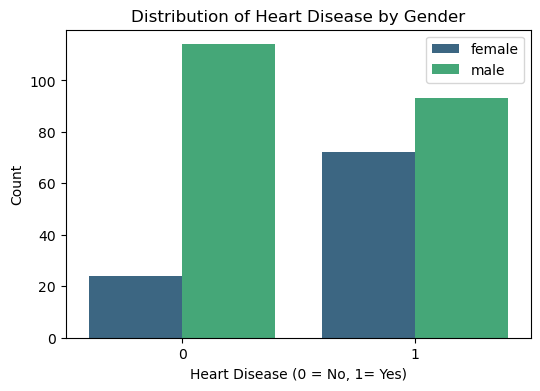

In [40]:
# Heart Disease by Gender
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x="target", hue="sex", palette= "viridis")
plt.title("Distribution of Heart Disease by Gender")
plt.xlabel("Heart Disease (0 = No, 1= Yes)")
plt.ylabel("Count")
plt.legend(["female", "male"])
plt.show()


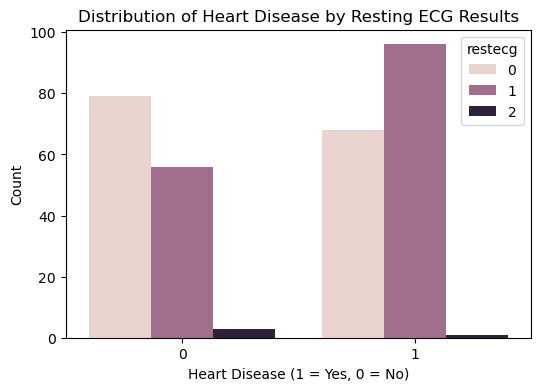

In [42]:
# Heart Disease by Resting ECG Results
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x="target", hue="restecg")
plt.title("Distribution of Heart Disease by Resting ECG Results")
plt.xlabel("Heart Disease (1 = Yes, 0 = No)")
plt.ylabel("Count")
plt.show()



Model Training

In [45]:
# Defining  Features (X) and Target (y)
X = data.drop(columns=["target"])  # All columns except 'target'
y = data["target"]  # 'target' column


In [47]:
# Splitting the data into Training and Testing Sets (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)


In [49]:
# Standardizing Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


We feature scale the feature data because some of the columns in our data have higher scale than some other columns.

In [51]:
# Initializing the Logistic Regression Model
model = LogisticRegression()

# Training the Model
model.fit(X_train, y_train)


LogisticRegression()

Model Evaluation

In [54]:
# Predicting on Test Data
y_pred = model.predict(X_test)

In [56]:
y_pred_df = pd.DataFrame({'Expected':y_test, 'Predicted':y_pred})
y_pred_df.head(10)

,Expected,Predicted
179,0,0
228,0,1
111,1,1
246,0,0
60,1,1
9,1,1
119,1,1
223,0,0
268,0,0
33,1,0


In [58]:
# Calculating Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.2f}")


Model Accuracy: 0.85


The model is correctly classifying 85% of cases. 

In [60]:
# Generating Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[25  4]
 [ 5 27]]


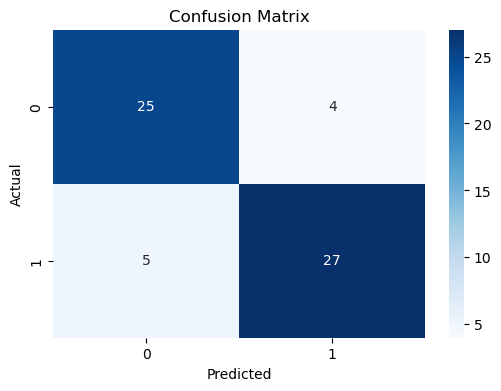

In [64]:
# Visualizing Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Only 5 cases were false negative, which occurs when the model incorrectly predicts a negative outcome for an actual positive case (e.g., predicting "no heart disease" when heart disease is present).
Only 4 cases were false positive, which occurs when the model incorrectly predicts a positive outcome for an actual negative case (e.g., predicting "heart disease" when there is none).

In [67]:
#Getting predicted probabilities for the positive class (heart disease)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Selecting probabilities for class 1 (heart disease)

# Calculating log loss
log_loss_value = log_loss(y_test, y_pred_proba)
print("Cross-Entropy Loss (Log Loss):", log_loss_value)

Cross-Entropy Loss (Log Loss): 0.3647983878502377


The log loss of 0.365 indicates how well the predicted probabilities align with the actual labels, Log Loss is closer to and this means the model's predicted probabilities are highly accurate, aligning closely with actual outcomes.

In [69]:
# Calculating precision, recall, f1, roc_auc
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)


Precision: 0.8709677419354839
Recall: 0.84375
F1 Score: 0.8571428571428571
ROC AUC Score: 0.9267241379310345


The precision (0.87) indicates that 87% of the positive predictions are correct. Recall (0.84): This shows that the model correctly identifies 84% of the actual positive cases. F1 Score (0.86): The F1 score, a balance between precision and recall, suggests that the model is handling the trade-off between precision and recall effectively.
ROC AUC Score (0.93), indicating that the model has good discriminative power between the positive and negative classes. A score closer to 1.0 shows excellent separation between classes.